# Mathematical description our model

... as I understand it :)

## Structure

The following set of variables and equations is described for one ion species. It would be similar for multiple species, with the so far unknown part being how they influence each others rates across the membrane.

### Variables

#### Time $\:t$

#### Concentrations $\:c(t)$

* Inside the cell $\:c_{int}(t)$
* Outside the cell $\:c_{ext}(t)$

$\implies$ Which make the concentration gradient $$\varDelta c = c_{int} - c_{ext} $$
    
#### (Diffusion-) Rates $\:v(\varDelta c,\:...)$

Where $v$ is the sum the rates across all membrane components, namely

* Some base level rate for the rest of the membrane $\:v_{mem}$
* Respiratory chain $\:v_{res}$
* ATP-Synthetase $\:v_{ATP}$
* Channel of interest $\:v_{ch}$

$$\implies v = \sum_{i \in C} v_i = v_{res} + v_{ATP} + v_{ch} + v_{mem} $$

where we call the set of  $\:(res,\:ATP,\:ch,\:mem) = C$ and with the $v_i$ each directed inward.

### Parameters

#### Volumes $\:V$

* Inside the cell $\:V_{int}$
* Outside the cell $\:V_{ext}$

with $V_{ext}$ being some fixed volume of effective distribution around the membrane.

### Equations

The main idea is that the rate of movement across the membrane determines the concentration (gradient), which in turn changes the rates.

Explicitly, the changes in concentration on the in- and outside $\frac{\partial c_{int}}{\partial t}$ and $\frac{\partial c_{ext}}{\partial t}$ correspond to

$$\frac{\partial c_{int}}{\partial t} = \frac{v}{V_{int}} \qquad \mathrm{and} \qquad \frac{\partial c_{ext}}{\partial t} = - \frac{v}{V_{ext}}$$


For implementation, we introduce the spacial "coordinate" $x$ which can take the values 0 or 1 meaning inside or outside, respectively.

# Implementation

In [6]:
import numpy as np
from scipy.integrate import odeint

## Parameters

In [45]:
V = [5, 10]
c_0 = [5, 10]

a = 0.1

## Functions

In [50]:
def v(c):
    gradc = c[1] - c[0]
    return a * gradc

def c(c, t):
    dcdt = [v(c)/V[0], -v(c)/V[1]]
    return dcdt

## Integration

In [55]:
t = np.linspace(0, 100, 1001)
solution = odeint(c, c_0, t, args=())

In [56]:
solution

array([[  5.        ,  10.        ],
       [  5.00998503,   9.99500749],
       [  5.01994014,   9.99002993],
       ..., 
       [  8.16637778,   8.41681111],
       [  8.16687789,   8.41656105],
       [  8.16737651,   8.41631174]])

## Visualize

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

### Time-Concentration Diagram

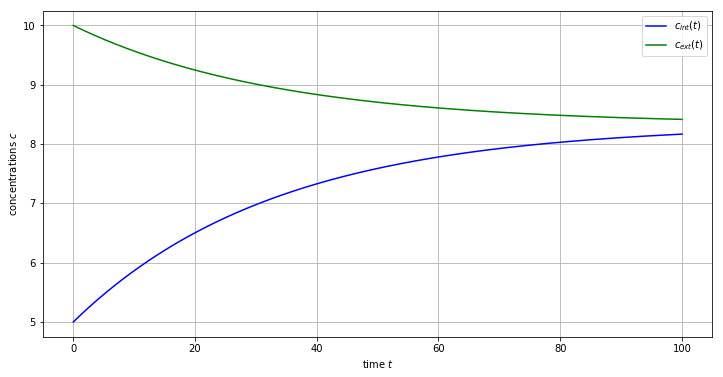

In [58]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(t, solution[:, 0], 'b', label='$c_{int}(t)$')
plt.plot(t, solution[:, 1], 'g', label='$c_{ext}(t)$')
plt.legend(loc='best')
plt.xlabel('time $t$')
plt.ylabel('concentrations $c$')
plt.grid()
plt.show()

### Spatial Animation

In [65]:
# Generate image array
height = 400
width = 400

# Initialize array
image = np.zeros((height, width))

#
image[int(height/2+10):int(height/2-10)] = 1

In [59]:
# Make figure and animation
fig = plt.figure()
im=plt.imshow(np.zeros((height, width)), interpolation='none', cmap='seismic', vmin=0, vmax=2)
    
# initialization function: plot the background of each frame
def init():
    im.set_data(np.zeros((N_ROW, N_COL)))
    return [im]

# animation function. This is called sequentially
def animate(i):
    im.set_array(frames[i])
    return [im]

# call the animator.  blit=True means only re-draw the parts that have changed.
laenge = int(gesamtschritte/intervall)
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=laenge, interval=100, blit=True)
#animation als *.mp4 speichern
anim.save('CSC_animation_.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

NameError: name 'N_ROW' is not defined